__Sept. 18, 2019__
<br>__Diamonds__

For this assignment, students were given a dataset on diamonds to find any relationships that could be gleamed from the data set. We start by importing the necessary chart plotting tools (Pandas, Matplotlib, and Seaborn)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Then we upload the dataframe and have a preliminary look at the set we have to work with:

In [2]:
diamonds = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


I experiment with basic commands to feel the data out.

In [3]:
diamonds.columns


Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [4]:
diamonds = diamonds.drop('Unnamed: 0', axis=1)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
diamonds.shape

(53940, 10)

In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [8]:
diamonds.index

RangeIndex(start=0, stop=53940, step=1)

In [9]:
diamonds.values

array([[0.23, 'Ideal', 'E', ..., 3.95, 3.98, 2.43],
       [0.21, 'Premium', 'E', ..., 3.89, 3.84, 2.31],
       [0.23, 'Good', 'E', ..., 4.05, 4.07, 2.31],
       ...,
       [0.7, 'Very Good', 'D', ..., 5.66, 5.68, 3.56],
       [0.86, 'Premium', 'H', ..., 6.15, 6.12, 3.74],
       [0.75, 'Ideal', 'D', ..., 5.83, 5.87, 3.64]], dtype=object)

In [10]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [11]:
diamonds['color'].values

array(['E', 'E', 'E', ..., 'D', 'H', 'D'], dtype=object)

In [12]:
diamonds.loc[53936]

carat      0.72
cut        Good
color         D
clarity     SI1
depth      63.1
table        55
price      2757
x          5.69
y          5.75
z          3.61
Name: 53936, dtype: object

In [13]:
diamonds[['carat','price']]

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


Right away, I see a clear correlation between the carat size and price of the diamond, the bigger the diamond the pricier it is. The scatter plot below seems to confirm this. However, I noticed there was a peculiar look to the scatter plot, almost as if the clusters were being split into distinct, vertical rectangular columns. It was then that I figured perhaps the hard edges seemed to imply that within a particular set of diamonds there was a clear baseline from which then different attributes come into play, causing the price to vary. 

Text(0, 0.5, 'price')

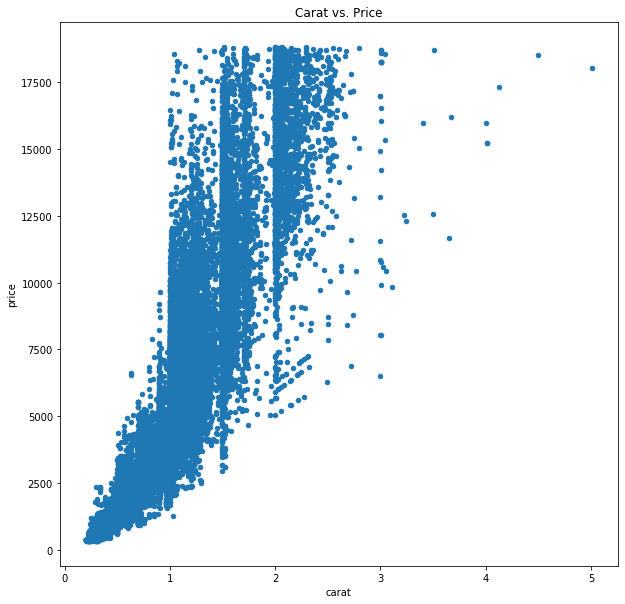

In [14]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
diamonds.plot(kind = 'scatter', x = 'carat', y = 'price', ax = ax) ## line is the default plot type
ax.set_title('Carat vs. Price') # Give the plot a main title
ax.set_xlabel('carat') # Set text for the x axis
ax.set_ylabel('price')# Set text for y axis

I decided that if I can isolate diamonds of two specific price points (i.e Diamond A at Price 1 vs. Diamond B at Price 2) I can then compare and contrast the two diamond sets and look at how similar/different their attributes are which may explain for price discrepancies. I started by identifying which price points would give me the biggest sample sizes but still be close enough to avoid any skewing of the data. I started by counting the frequencies of each unique price point.

In [15]:
price_benchmarks = diamonds['price'].value_counts() # find the counts for each unique price value
price_benchmarks

605      132
802      127
625      126
828      125
776      124
        ... 
13550      1
13014      1
6811       1
5354       1
11600      1
Name: price, Length: 11602, dtype: int64

I decided on the price points of __802.00__ and __828.00__ because the sample sizes were almost identical (just off by 2). I created a new dataset __'dcontrol'__ containing just the diamonds at these price points.

In [16]:
dcontrol = diamonds.loc[ (diamonds['price'] == 802) | (diamonds['price'] == 828) ]
dcontrol

,carat,cut,color,clarity,depth,table,price,x,y,z
32586,0.33,Ideal,E,VVS2,61.4,55.0,802,4.46,4.50,2.75
32587,0.33,Ideal,E,VVS2,61.0,57.0,802,4.46,4.49,2.73
32588,0.30,Ideal,D,VVS2,59.4,60.0,802,4.39,4.47,2.63
32589,0.33,Ideal,G,VVS1,61.8,59.0,802,4.45,4.48,2.76
32590,0.33,Ideal,G,VVS1,60.4,58.0,802,4.50,4.51,2.72
...,...,...,...,...,...,...,...,...,...,...
33508,0.40,Very Good,J,IF,62.7,60.0,828,4.64,4.70,2.93
33509,0.40,Very Good,J,IF,62.2,61.0,828,4.68,4.71,2.92
33510,0.40,Ideal,J,IF,62.4,56.0,828,4.71,4.74,2.95
33511,0.33,Ideal,F,VVS1,62.1,56.0,828,4.43,4.46,2.76


Now it was just a matter of comparing each individual attribute from both diamond sets to find any major correlations/relationships between the two. For the columns which contained integer/floating types I used a box-whisker plot whereas for the other columns, I used bar charts that displayed the frequency of each unique value for that attribute. I start with my box-whisker plots.

<br>This is for attribute 'x':

Text(0, 0.5, 'x')

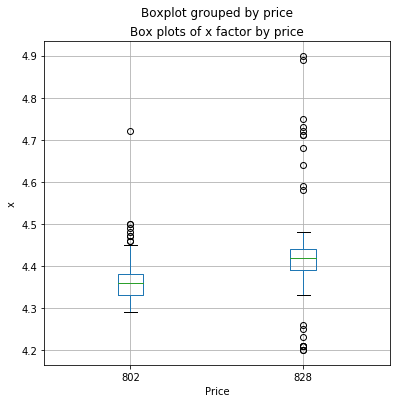

In [17]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis    
dcontrol[['x','price']].boxplot(by = 'price', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of x factor by price') # Give the plot a main title
ax.set_xlabel('Price') # Set text for the x axis
ax.set_ylabel('x')# Set text for y axis

So from here, I can see that diamonds of the higher price set have an overall a greater median 'x' value. So the the greater the 'x' attribute, the higher the price will be. Next is the 'y' attribute.

Text(0, 0.5, 'y')

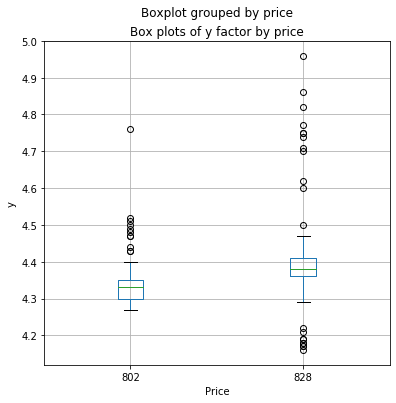

In [18]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis    
dcontrol[['y','price']].boxplot(by = 'price', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of y factor by price') # Give the plot a main title
ax.set_xlabel('Price') # Set text for the x axis
ax.set_ylabel('y')# Set text for y axis

Diamonds at the higher price set have an overall greater 'y' value. Next is the 'z' value.

Text(0, 0.5, 'z')

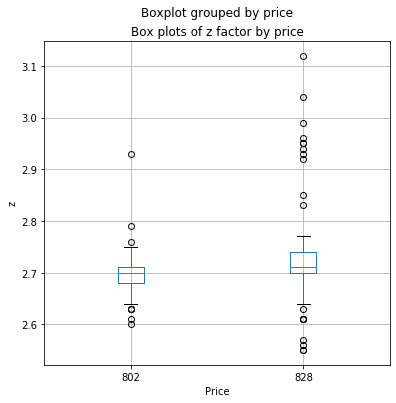

In [19]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis    
dcontrol[['z','price']].boxplot(by = 'price', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of z factor by price') # Give the plot a main title
ax.set_xlabel('Price') # Set text for the x axis
ax.set_ylabel('z')# Set text for y axis

Diamonds at the higher price set have an overall greater 'z' value although it does not seem to be as "significant" as the 'x' and 'y' values. Here, the 'z' value varies only by a little compared to the variation in the previous 'x' and 'y' values. Now, I move on to the Carat attribute.

Text(0, 0.5, 'Carat')

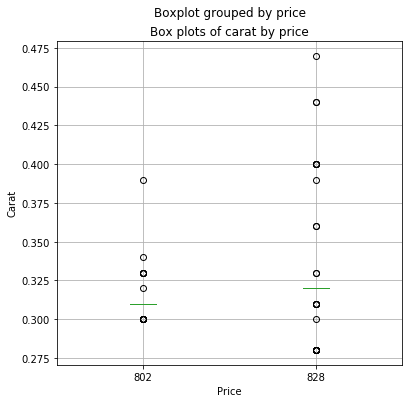

In [20]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis    
dcontrol[['carat','price']].boxplot(by = 'price', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of carat by price') # Give the plot a main title
ax.set_xlabel('Price') # Set text for the x axis
ax.set_ylabel('Carat')# Set text for y axis

The pricier diamonds have an overall greater median carat value so it looks like the bigger the diamond (carat, x-y-z axis) the more expensive it is, which seems to make intuitive sense. Now, for the depth attribute: 

Text(0, 0.5, 'Depth')

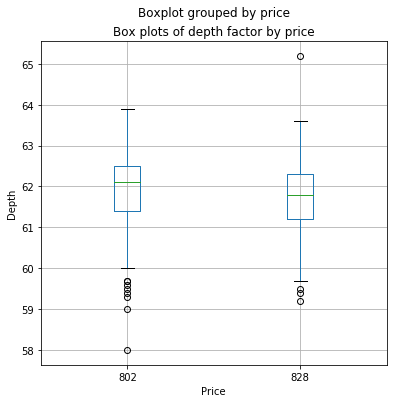

In [21]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis    
dcontrol[['depth','price']].boxplot(by = 'price', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of depth factor by price') # Give the plot a main title
ax.set_xlabel('Price') # Set text for the x axis
ax.set_ylabel('Depth')# Set text for y axis

Interestingly, it seems the more expensive diamonds have a smaller depth value than the cheaper ones. This implies that the 'shorter' the diamond sits on a ring, the more expensive it is. What about the table? (i.e the flat surface area on top of the diamond)

Text(0, 0.5, 'Table')

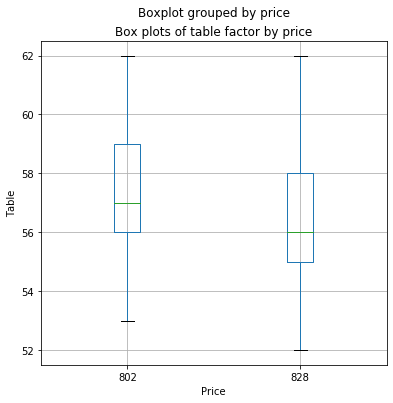

In [22]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis    
dcontrol[['table','price']].boxplot(by = 'price', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of table factor by price') # Give the plot a main title
ax.set_xlabel('Price') # Set text for the x axis
ax.set_ylabel('Table')# Set text for y axis

Again, we see an inverse relationship of a diamonds price and its table attribute. The pricier diamonds have a smaller table surface than the cheaper ones. Taking this with the previous depth finding, it seems the 'stubbier' and 'chubbier' you can make the diamond (all while packing in more carat size) the more expensive it is. Now, I move on to the non-integer type attributes to compare and contrast them through bar charts, starting with a diamond's cut. For the attributes, I created seperate tables for each price point to work with on an individual level.

Text(0, 0.5, 'Number of cuts')

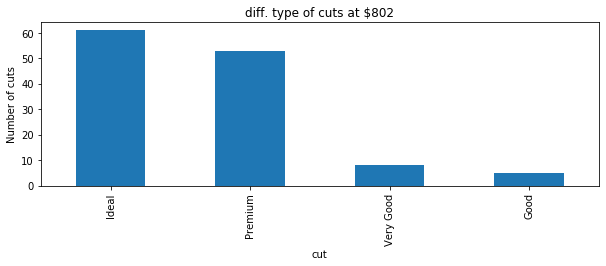

In [23]:
d802cut = diamonds.loc[ (diamonds['price'] == 802) & (diamonds['cut']) ]
d802cut

counts = d802cut['cut'].value_counts() # find the counts for each unique category
counts

fig = plt.figure(figsize=(10,3)) # define plot area
ax = fig.gca() # define axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('diff. type of cuts at $802') # Give the plot a main title
ax.set_xlabel('cut') # Set text for the x axis
ax.set_ylabel('Number of cuts')# Set text for y axis

Text(0, 0.5, 'Number of cuts')

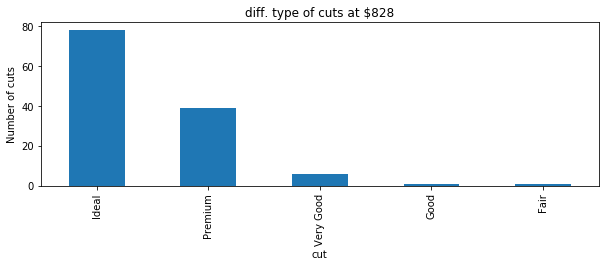

In [24]:
d828cut = diamonds.loc[ (diamonds['price'] == 828) & (diamonds['cut']) ]
d828cut

counts = d828cut['cut'].value_counts() # find the counts for each unique category
counts

fig = plt.figure(figsize=(10,3)) # define plot area
ax = fig.gca() # define axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('diff. type of cuts at $828') # Give the plot a main title
ax.set_xlabel('cut') # Set text for the x axis
ax.set_ylabel('Number of cuts')# Set text for y axis

So looking at the bar graphs for cuts, the more expensive diamonds have a higher proportion of 'Ideal' cuts vs. 'Premium' cuts, which tells me that 'Ideal' cuts are more valued and that a diamond cut as such will be more expensive than one with just a Premium cut. Next, I look at the Color attribute.

Text(0, 0.5, 'Number of diamonds in this color')

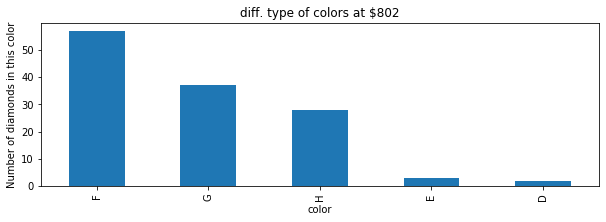

In [25]:
d802color = diamonds.loc[ (diamonds['price'] == 802) & (diamonds['color']) ]
d802color

counts = d802color['color'].value_counts() # find the counts for each unique category
counts

fig = plt.figure(figsize=(10,3)) # define plot area
ax = fig.gca() # define axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('diff. type of colors at $802') # Give the plot a main title
ax.set_xlabel('color') # Set text for the x axis
ax.set_ylabel('Number of diamonds in this color')# Set text for y axis

Text(0, 0.5, 'Number of diamonds in this color')

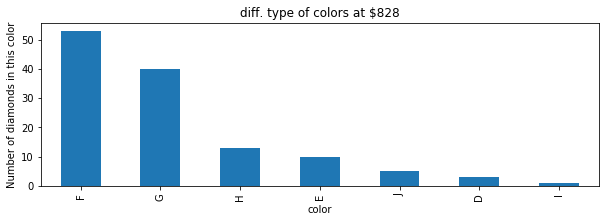

In [26]:
d828color = diamonds.loc[ (diamonds['price'] == 828) & (diamonds['color']) ]
d828color

counts = d828color['color'].value_counts() # find the counts for each unique category
counts

fig = plt.figure(figsize=(10,3)) # define plot area
ax = fig.gca() # define axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('diff. type of colors at $828') # Give the plot a main title
ax.set_xlabel('color') # Set text for the x axis
ax.set_ylabel('Number of diamonds in this color')# Set text for y axis

Diamonds that are the color of 'F' and 'G' are valued higher since the $828.00 diamonds have a higher concentration of color F & G's than the 802.00 diamonds. Next is the clarity attribute.

Text(0, 0.5, 'Number of diamonds at this clarity')

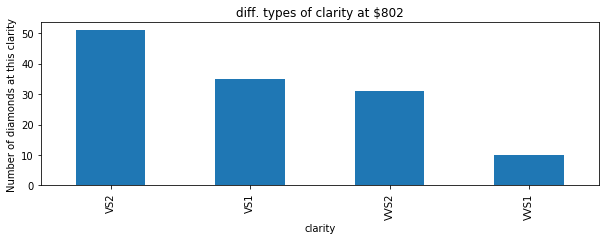

In [27]:
d802clarity = diamonds.loc[ (diamonds['price'] == 802) & (diamonds['clarity']) ]
d802clarity

counts = d802clarity['clarity'].value_counts() # find the counts for each unique category
counts

fig = plt.figure(figsize=(10,3)) # define plot area
ax = fig.gca() # define axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('diff. types of clarity at $802') # Give the plot a main title
ax.set_xlabel('clarity') # Set text for the x axis
ax.set_ylabel('Number of diamonds at this clarity')# Set text for y axis

Text(0, 0.5, 'Number of diamonds at this clarity')

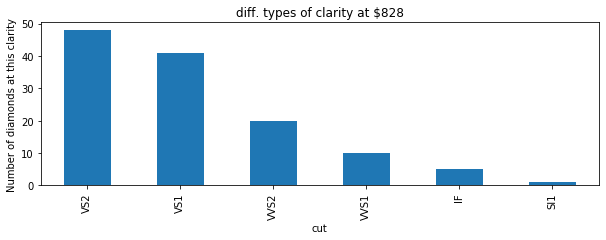

In [28]:
d828clarity = diamonds.loc[ (diamonds['price'] == 828) & (diamonds['clarity']) ]
d828clarity

counts = d828clarity['clarity'].value_counts() # find the counts for each unique category
counts

fig = plt.figure(figsize=(10,3)) # define plot area
ax = fig.gca() # define axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('diff. types of clarity at $828') # Give the plot a main title
ax.set_xlabel('cut') # Set text for the x axis
ax.set_ylabel('Number of diamonds at this clarity')# Set text for y axis

Diamonds of the VS clarity are generally more expensive than diamonds of WS clarity since the 828.00 diamonds have a higher proportion of VS1 & VS2 than the 802.00 diamonds. 

__Final Conclusions:__

So it looks like the bigger the size of the diamond (carat size, x-y-z axis dimensions) and the "stubbier" and "shorter" (depth, table) you can make it, the greater the price will be. I have listed the individual attributes as it relates to the diamond's price as below:
<br>
<br>
__Carat__ - (positive correlation) - as carat size __increases__, so does the price of the diamond. 
<br>__Cut__ - If a diamond is of either __Ideal__ or __Premium cut__, the greater the diamond price will be. 
<br>__Color__ - If a diamond is of either color __F__ or __G__, the greater the diamond price will be.
<br>__Clarity__ - If a diamond is of either __VS clarity__ (whether __VS1__ or __VS2__), the greater the price will be.
<br>__Depth__ - (negative correlation) - as the depth of the diamond __decreases__, the price of the diamond __increases__.
<br>__Table__ - (negative correlation) - as the table size of the diamond __decreases__, the price of the diamond __increases__.